In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import bootstrap
import matplotlib.pyplot as plt 
import seaborn as sns

monsoon_data = pd.read_csv('aismr-1871-2016-rain.txt', index_col=False, header=None, delim_whitespace=True)
monsoon_data.columns = ['Year', 'Rainfall']
monsoon_data

,Year,Rainfall
0,1871,84.87
1,1872,91.36
2,1873,75.73
3,1874,97.45
4,1875,92.97
...,...,...
141,2012,80.51
142,2013,94.73
143,2014,73.64
144,2015,72.81


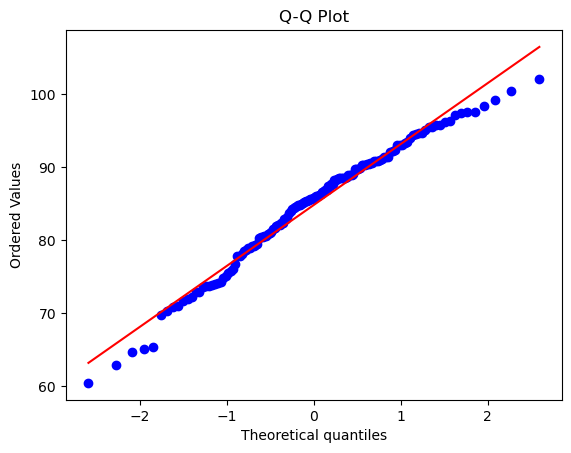

In [8]:
monsoon_data_array = np.array(monsoon_data['Rainfall'].values)

stats.probplot(monsoon_data_array, dist="norm", plot=plt)

# Show the plot
plt.title("Q-Q Plot")
plt.show()

### (a) Compute the confidence interval for mean and variance on the monsoon data using bootstrap

In [12]:
conversion = (monsoon_data_array,) #converts the array for using scipy bootstrap 
conf_inter = bootstrap(conversion, np.mean, confidence_level=0.95, n_resamples=1000)
print('95% CI on the mean for the monsoon data is:', conf_inter.confidence_interval)

95% CI on the mean for the monsoon data is: ConfidenceInterval(low=83.36177128971813, high=86.15681962757117)


In [13]:
conf_inter = bootstrap(conversion, np.var, confidence_level=0.95, n_resamples=1000)
print('95% CI on the variance for the monsoon data is:', conf_inter.confidence_interval)


95% CI on the variance for the monsoon data is: ConfidenceInterval(low=56.376115653131784, high=88.03285780609671)


#### A note - these methods are non-parametric, they use the percentiles from each bootstrap distribution

### (B) Test the Difference in mean and variance of rainfall between pre-1980 and post - 1980

In [22]:
pre1980 = monsoon_data[monsoon_data['Year'] < 1980]
pre_array = pre1980['Rainfall'].values
post1980 = monsoon_data[monsoon_data['Year'] >= 1980]
post_array = post1980['Rainfall'].values

#### Testing the Mean

In [26]:
#parameter of interest: difference in mean between pre and post 1980's rainfall data
#Null: u1 - u2 = 0
#Alternative hypothesis: u1 - u2 does not equal zero 
#test statistic is T0 = (D-Delta0)/SD / sqrt(n)
#reject H0 if the p-value is <0.05
t_statistic, p_value = stats.ttest_ind(pre_array, post_array, equal_var=False)
print(t_statistic, p_value)

1.4495242159437234 0.15196584154136858


#### Testing the Variance

In [28]:
var1 = np.var(pre_array, ddof = 1)
var2 = np.var(post_array, ddof = 1)
f_stat = var1 / var2
f_stat
df1 = len(pre_array) - 1
df2 = len(post_array) - 1
p_value = 1 - stats.f.cdf(f_stat, df1, df2)
print('p_value is', p_value)
f_critical_upper = stats.f.ppf( 0.025, df1, df2)
print('critical value upper for F is',f_critical_upper)
f_critical_lower = stats.f.ppf( 0.025, df1, df2)
f_critical_lower = 1 / f_critical_lower
print('critical value lower for F is',f_critical_lower)
print('F_stat is', f_stat)

p_value is 0.3560894889069144
critical value upper for F is 0.6044490591295253
critical value lower for F is 1.6543991340479751
F_stat is 1.1211290429333036


### For both mean and variance, there is no significant difference between pre 1980 and post 1980 in rainfall 